#Rozac Lot

Eli Daisy produce el fármaco Rozac a partir de cuatro
productos químicos. Hoy deben producir 1.000 libras de la droga.
Los tres ingredientes activos de Rozac son A, B y C. Por
peso, al menos el 8% de Rozac debe contener A, al menos el 4%
de B, y al menos 2% de C. El costo por libra de cada
químico y la cantidad de cada ingrediente activo en 1 libra
de cada producto químico se dan en la Tabla 19.
Es necesario que se utilicen al menos 100 lb de químico 2.
Formule un LP cuya solución determinaría la forma más barata de producir el lote actual de Rozac.

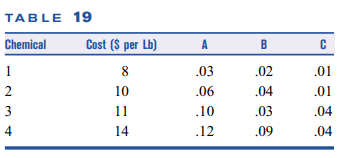

#Conjuntos

$ i = \text{Ingrediente indexado por } i$

$ j = \text{Químico indexado por } j$

# Parámetros

$P_{ij} = \textrm{Proporción de componente } i \textrm{ en el químico } j$

$C_{j} = \textrm{Costo de producir el químico } j $

$R_{i} = \textrm{Cantidad requerida del ingrediente } i $

## Variables de decisión

$ x_{j} = \textrm{Cantidad producida del químico }j $

## Función Objetivo

$$ \textrm{Min } z = \sum_{i = 1}^{n} C_{j}\: x_{j} $$

## Restricciones

Deben producir mínimo 1000 libras de droga,

$$ \sum_{j = 1}^{n} x_{j} = 1000$$

Cada químico debe mantener ciertas proporciones,

$$ \sum_{j = 1}^{n} P_{ij} \: x_{j} \geq R_{i} \sum_{j = 1}^{n} x_{j}, \forall i$$

Se debe producir como mínimo 100 lb del químico 2,

$$ x_{2}  \geq 100 $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 38.8 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
ingredientes = range(3)
quimicos = range(4)

In [8]:
#Parámetros

P = [[0.03, 0.02, 0.01], [0.06, 0.04, 0.01], [0.1, 0.03, 0.04], [0.12, 0.09, 0.04]]

C = [8, 10, 11, 14]

R = [80, 40, 20]

In [9]:
# Crear la instancia del modelo
model = LpProblem(name="Rozac_Lot", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (quimicos), 0, None, LpContinuous)

# Agregar la función objetivo
model += lpSum([C[j] * X[j] for j in quimicos])

# Agregar las restricciones

model += lpSum(X[j] for j in quimicos) == 1000

for i in ingredientes:
  model += lpSum(P[j][i] * X[j] for j in quimicos) >= R[i]

model += X[1] >= 100

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Costos totales = $", value(model.objective))

Status: Optimal
X_0 = 0.0
X_1 = 100.0
X_2 = 0.0
X_3 = 900.0
Costos totales = $ 13600.0
